In [1]:
import tensorflow.compat.v1 as tf
from local_settings import MODEL_DIR
import config
from config import CNN_INPUT_IMG_WIDTH, CNN_INPUT_IMG_HEIGHT
from cnn import cnn_model_fn
import numpy as np

**Install matplotlib library before proceeding.**

Run `pip install matplotlib` in terminal shell.

In [2]:
import matplotlib.pyplot as plt

In [3]:
classifier = tf.estimator.Estimator(
        model_fn=cnn_model_fn,
        model_dir=MODEL_DIR)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'cnn_tf_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [4]:
classifier.get_variable_names()

['beta1_power',
 'beta2_power',
 'conv2d/bias',
 'conv2d/bias/Adam',
 'conv2d/bias/Adam_1',
 'conv2d/kernel',
 'conv2d/kernel/Adam',
 'conv2d/kernel/Adam_1',
 'conv2d_1/bias',
 'conv2d_1/bias/Adam',
 'conv2d_1/bias/Adam_1',
 'conv2d_1/kernel',
 'conv2d_1/kernel/Adam',
 'conv2d_1/kernel/Adam_1',
 'dense/bias',
 'dense/bias/Adam',
 'dense/bias/Adam_1',
 'dense/kernel',
 'dense/kernel/Adam',
 'dense/kernel/Adam_1',
 'dense_1/bias',
 'dense_1/bias/Adam',
 'dense_1/bias/Adam_1',
 'dense_1/kernel',
 'dense_1/kernel/Adam',
 'dense_1/kernel/Adam_1',
 'global_step']

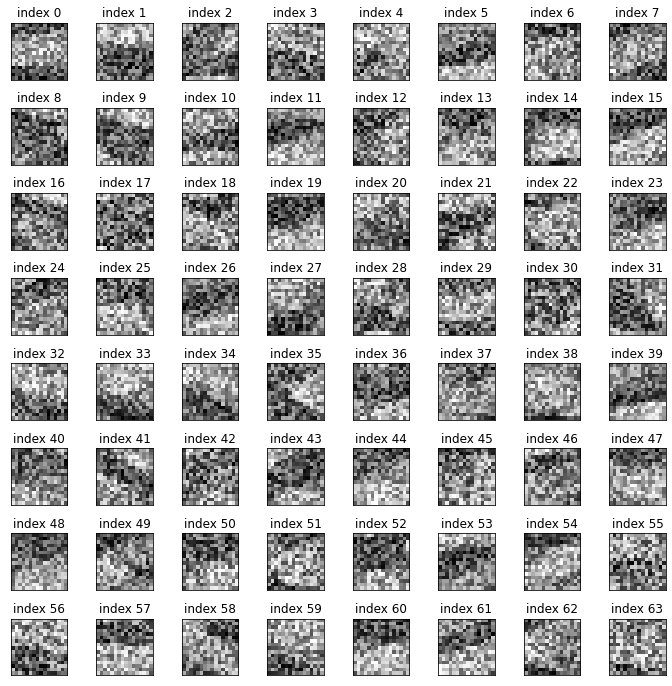

In [5]:
kernels = classifier.get_variable_value('conv2d/kernel')

fig, axs = plt.subplots(8, 8, gridspec_kw={'hspace': 0.5}, figsize=(12,12))
for i in range(8):
    for j in range(8):
        idx = 8*i + j
        axs[i, j].imshow(kernels[:, :, 0, idx], cmap='gray')
        axs[i, j].set_title(f'index {idx}')
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

In [6]:
test_data = np.load('training_data/npy/test_x.npy').astype(np.float32)

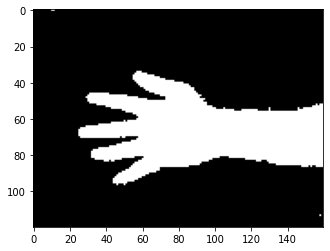

In [7]:
input_img = test_data[100]
plt.imshow(input_img, cmap='gray')

**Before proceeding, make sure that the following snippet is NOT commented in the file `cnn.py`:**
```py   
prediction_data.update({
    'conv1': conv1,
    'pool1': pool1,
    'conv2': conv2,
    'pool2': pool2,
    'flat': flat,
    'dense': dense,
    'dropout': dropout,
    'logits': logits,
})
```

In [8]:
def input_generator():
    yield input_img

def input_fn():
    ds = tf.data.Dataset.from_generator(
        input_generator,
        tf.float32,
        tf.TensorShape([CNN_INPUT_IMG_HEIGHT, CNN_INPUT_IMG_WIDTH]))
    feature = ds.make_one_shot_iterator().get_next()
    return {'input': feature}

output = classifier.predict(input_fn)

result = next(output)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating

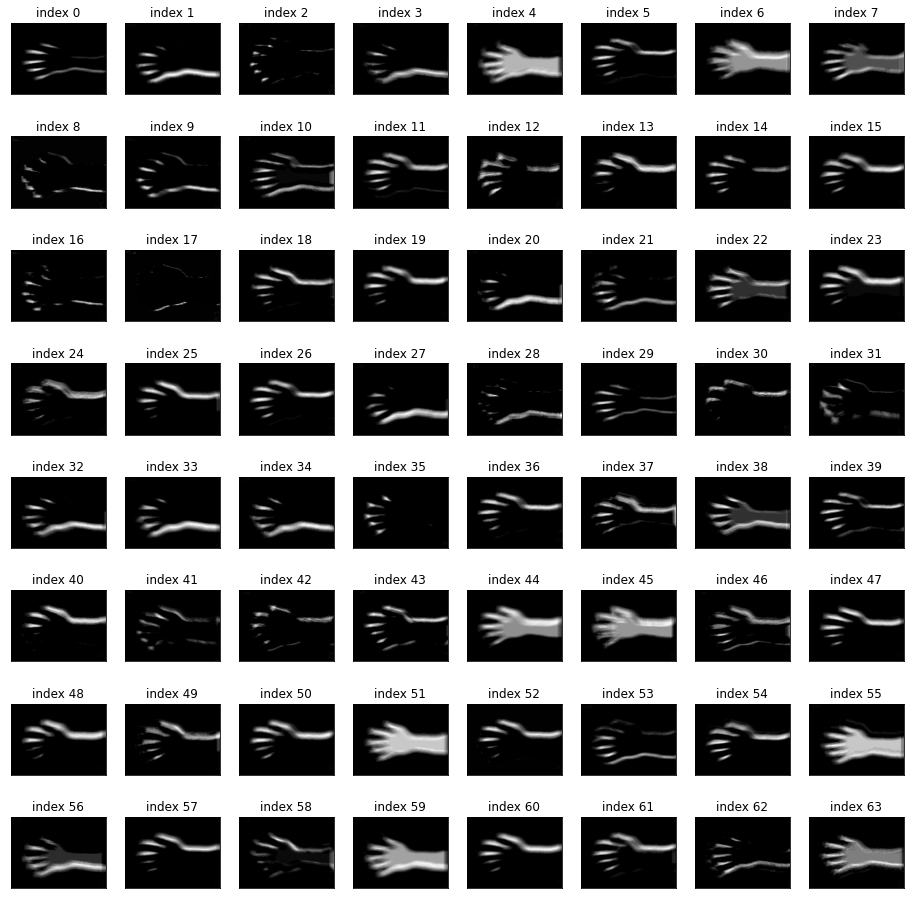

In [9]:
imgs = result['conv1']

fig, axs = plt.subplots(8, 8, gridspec_kw={'hspace': 0.5}, figsize=(16,16))
for i in range(8):
    for j in range(8):
        idx = 8*i+j
        axs[i, j].imshow(imgs[:, :, idx], cmap='gray')
        axs[i, j].set_title(f'index {idx}')
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

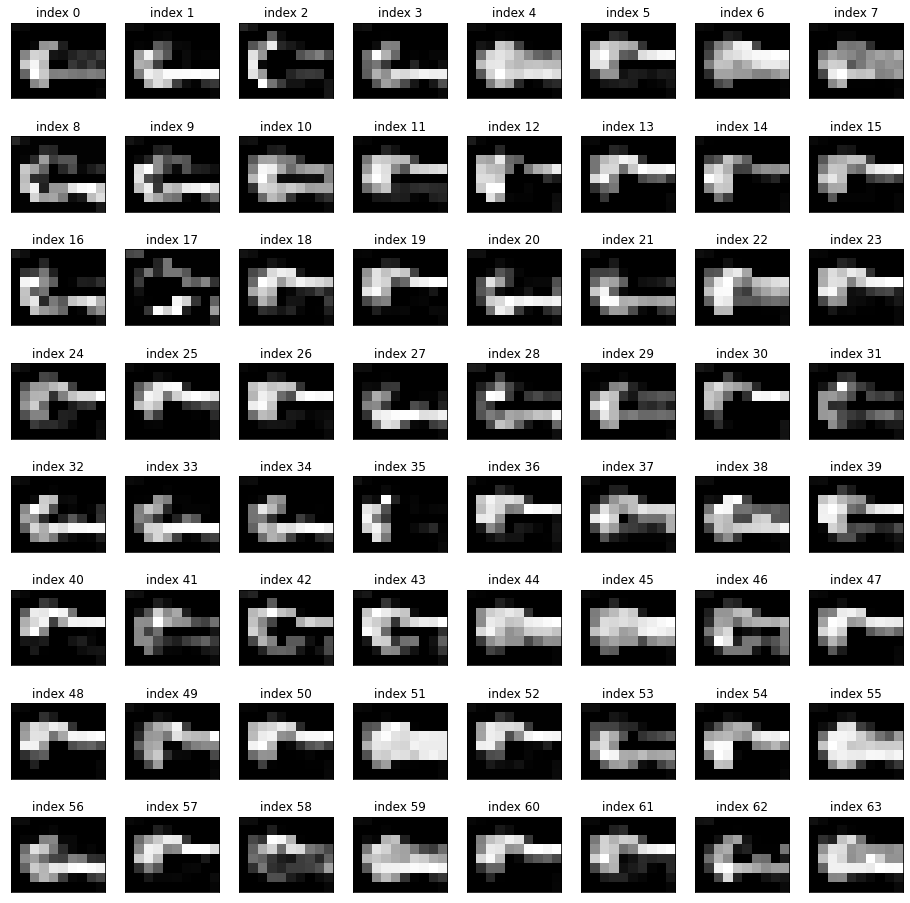

In [10]:
imgs = result['pool1']

fig, axs = plt.subplots(8, 8, gridspec_kw={'hspace': 0.5}, figsize=(16,16))
for i in range(8):
    for j in range(8):
        idx = 8*i+j
        axs[i, j].imshow(imgs[:, :, idx], cmap='gray')
        axs[i, j].set_title(f'index {idx}')
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])